In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fire=pd.read_csv('forestfires.csv')

In [3]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# `EDA`

In [4]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# `Checking for duplicates and removing if any`

In [6]:
fire[fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
fire.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
fire.reset_index(inplace=True)

# `Dropping unnecessary columns`

In [9]:
df1 =fire.iloc[:,0:11]
df2 = pd.concat([df1,fire['size_category']],axis=1)
df2

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


# `Label Encoding`

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
df2['month']= le.fit_transform(df2['month']) 
df2['day']= le.fit_transform(df2['day'])
df2['size_category']= le.fit_transform(df2['size_category'])

# `visualizations`

[]

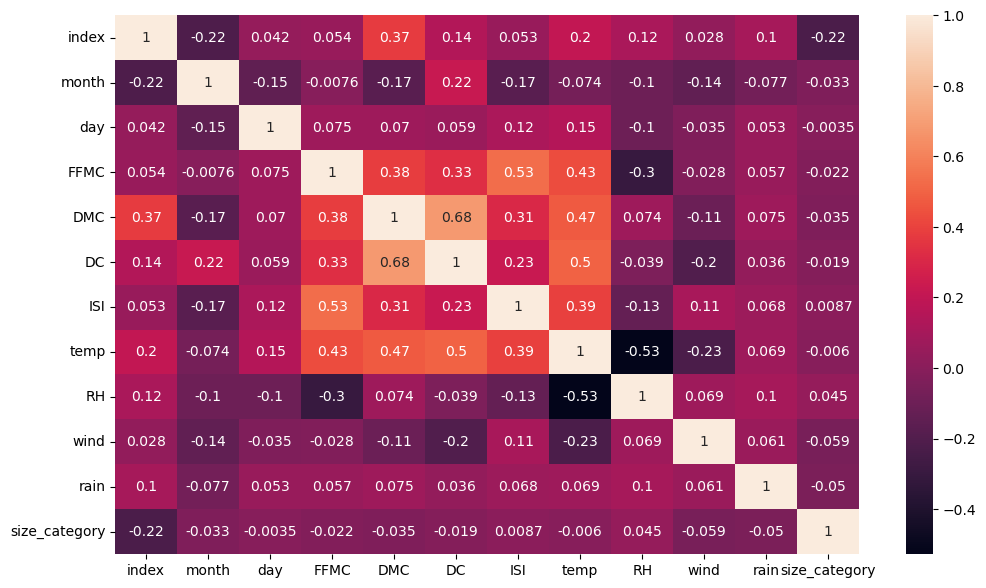

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(df2.corr(),annot=True)
plt.plot()

# `Insights`
1) DC and DMC have a positive correlation between them
2) ISI and FFMC also have a positive correlation.
3) RH and temp are negatively correlated to each other

<Axes: ylabel='FFMC'>

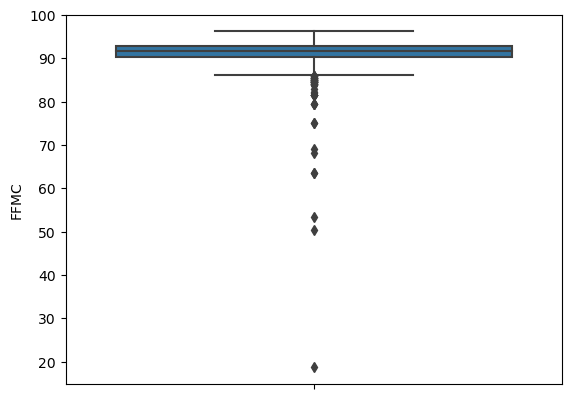

In [29]:
sns.boxplot(data=df2,y='FFMC')

<Axes: ylabel='DMC'>

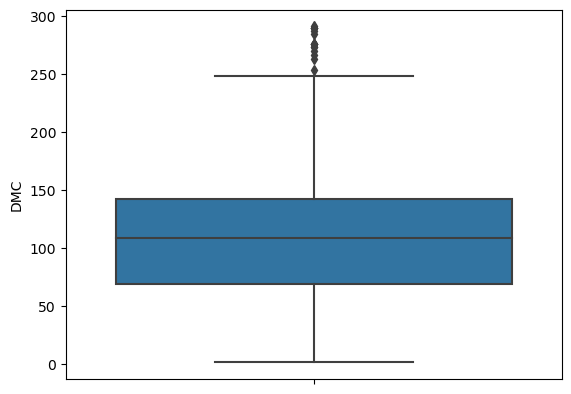

In [30]:
sns.boxplot(data=df2,y='DMC')

<Axes: ylabel='ISI'>

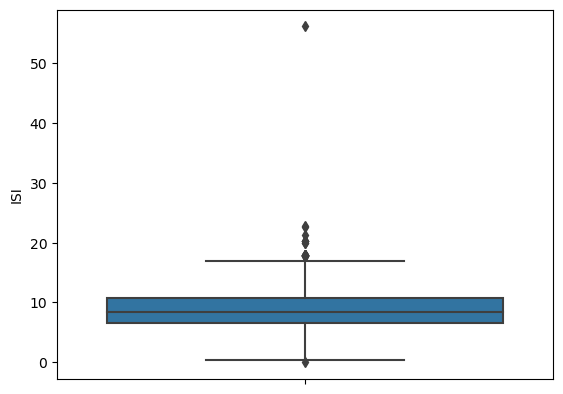

In [31]:
sns.boxplot(data=df2,y='ISI')

<Axes: ylabel='DC'>

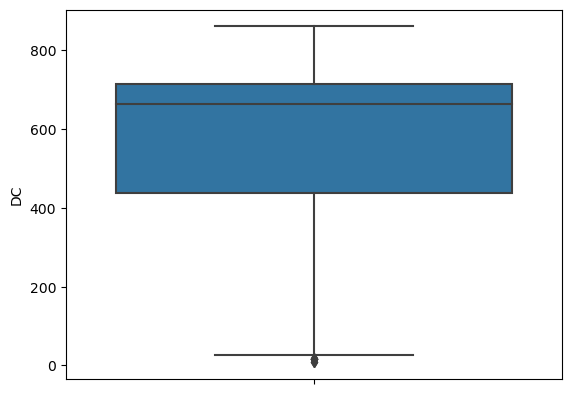

In [32]:
sns.boxplot(data=df2,y='DC')

# `Insights`
As we can see there are a lot of outliers present but we cannot drop them as it would affect the accuracy of  the model.

# `SPLITTING THE DATA`

In [14]:
x=df2.iloc[:,0:11]
y=df2.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.28)

# `Performing SVM`

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [18]:
clf = SVC()
parameters = {'kernel':['rbf'],'gamma':[100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01, 0.0001],'C':[50, 35, 15, 12, 10, 6, 5, 0.1, 0.001]}
gsv = GridSearchCV(clf, param_grid = parameters, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 35, 15, 12, 10, 6, 5, 0.1, 0.001],
                         'gamma': [100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01,
                                   0.0001],
                         'kernel': ['rbf']})

In [19]:
gsv.best_params_

{'C': 6, 'gamma': 0.0001, 'kernel': 'rbf'}

In [20]:
model = SVC(C = 10, gamma = 0.0001)
model.fit(x_train , y_train)

SVC(C=10, gamma=0.0001)

In [21]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [22]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of SVM =", accuracy)

Accuracy of SVM = 80.6896551724138


In [23]:
confusion_matrix(y_test, y_pred)

array([[25, 11],
       [17, 92]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        36
           1       0.89      0.84      0.87       109

    accuracy                           0.81       145
   macro avg       0.74      0.77      0.75       145
weighted avg       0.82      0.81      0.81       145

